In [44]:
!pip install kneed

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from mpl_toolkits.mplot3d import Axes3D

# Exploratory Data Analysis

In [46]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


In [48]:
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


# Encoding

In [49]:
from sklearn.preprocessing import LabelEncoder
education_mapping = {
    'High School': 0,
    'Bachelor': 1,
    'Master': 2,
    'PhD': 3
}

df['Education'] = df['Education'].map(education_mapping)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,1,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,0,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,0,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,0,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,1,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


# Visualization

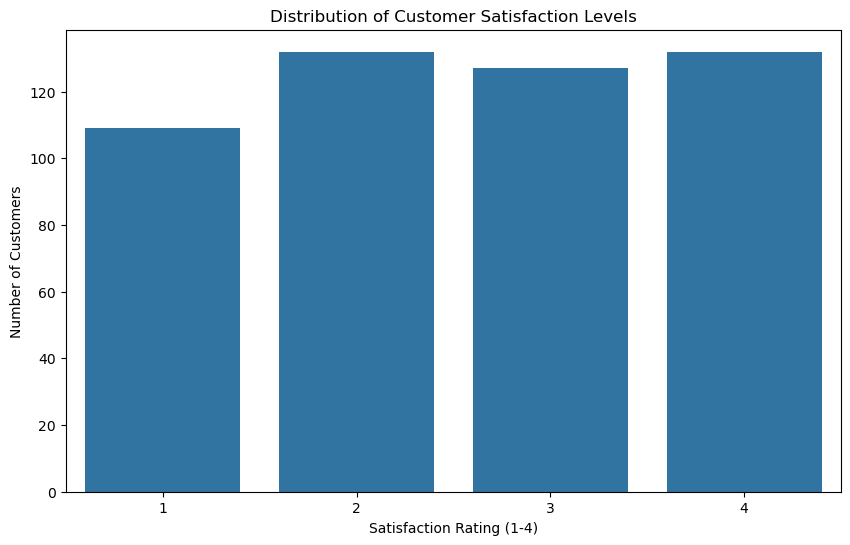

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Customer_Satisfaction')
plt.title('Distribution of Customer Satisfaction Levels')
plt.xlabel('Satisfaction Rating (1-4)')
plt.ylabel('Number of Customers')
plt.show()

This bar chart visualizes the number of customers for each of the four satisfaction ratings, from 1 to 4. It shows that all four categories received a high number of responses with rating '1' in the lowest frequency, with approximately 109 customers. The remaining ratings are clustered closely at the top: rating '2' has the highest count at about 132 customers, followed immediately by rating '4' at about 131, and rating '3' at about 128. This indicates a fairly even, high distribution among ratings 2, 3, and 4.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5748\3441845990.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ordered_labels)


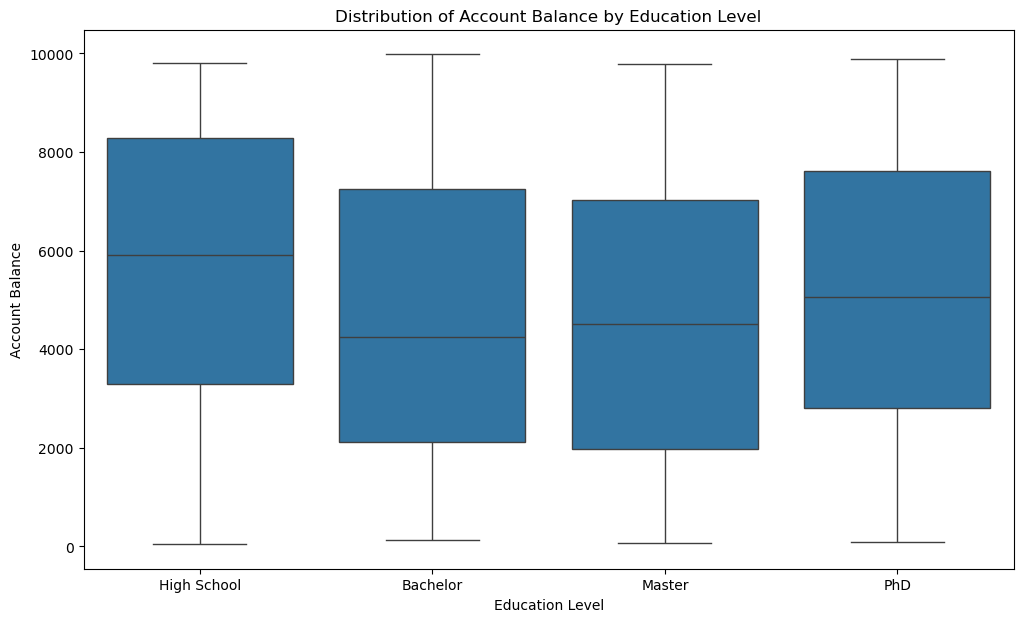

In [51]:
plt.figure(figsize=(12, 7))
ordered_labels = ['High School', 'Bachelor', 'Master', 'PhD']
ordered_codes = [0, 1, 2, 3] 
ax = sns.boxplot(data=df, x='Education', y='Balance', order=ordered_codes)
ax.set_xticklabels(ordered_labels)
plt.title('Distribution of Account Balance by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Account Balance')
plt.show()

This boxplot visualizes the distribution of account balances across four different education levels. The chart shows that the "High School" group has the highest median account balance, at approximately $6,000. The "Bachelor" and "Master" groups have very similar distributions with the lowest median balances, both resting around $4,300-$4,500. The "PhD" group's median balance is positioned between the others at roughly $5,100. All four categories show a similar wide spread in their balances, ranging from near 0 to 10,000, and there are no apparent outliers.

# K-Means Clustering

In [52]:
features_for_clustering = [
    'Income', 'Age', 'Education', 'Credit_Score', 
    'Years_with_Bank', 'Transaction_Count', 'Balance', 
    'Loan_Approval_Amount', 'Credit_Card_Limit', 
    'Purchase_Frequency', 'Customer_Satisfaction', 'Online_Activity'
]

df_cluster = df[features_for_clustering].copy()

In [53]:
# 1. Dataset Unscaled
df_unscaled = df_cluster.copy()

# 2. Dataset Scaled
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_unscaled)
df_scaled = pd.DataFrame(df_scaled, columns=df_unscaled.columns)

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

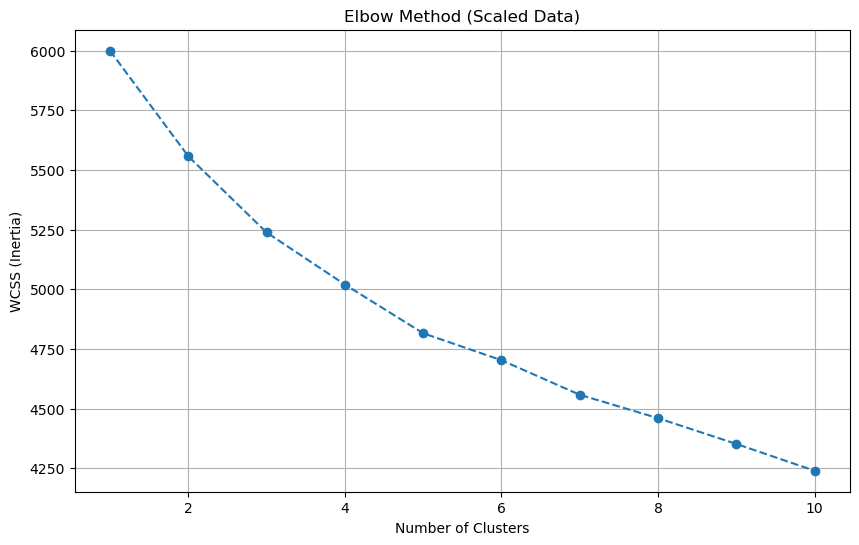

In [54]:
wcss = []
k_range = range(1, 11)

for i in k_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method (Scaled Data)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

Three clusters is optimal because the elbow plot shows a sharp decrease in WCSS up to k = 3, after which the curve flattens. This means adding more clusters gives little improvement in performance. With three clusters, the model stays accurate yet simple, effectively capturing the main data patterns without unnecessary complexity.

In [55]:
K_OPTIMAL = 3

# Model 1: Data UNSCALED
kmeans_unscaled = KMeans(n_clusters=K_OPTIMAL, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters_unscaled = kmeans_unscaled.fit_predict(df_unscaled)

# Model 2: Data SCALED
kmeans_scaled = KMeans(n_clusters=K_OPTIMAL, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters_scaled = kmeans_scaled.fit_predict(df_scaled)

# Compare
silhouette_unscaled = silhouette_score(df_unscaled, clusters_unscaled)
silhouette_scaled = silhouette_score(df_scaled, clusters_scaled)

print(f"Silhouette Score (Unscaled): {silhouette_unscaled}")
print(f"Silhouette Score (Scaled): {silhouette_scaled}")

Silhouette Score (Unscaled): 0.36205695980146263
Silhouette Score (Scaled): 0.0682392669352293


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Unscaled model (Silhouette Score: 0.362) is significantly better than scaled model (Score: 0.068). This is because K-Means is a distance-based algorithm. Scaling is normally used to prevent features with large numeric ranges (like Income or Balance) from dominating features with small ranges (like Age). However, low scaled score shows that when all features were given equal weight, the "noise" from less important features actually hid the natural groupings. The high unscaled score proves that the most dominant and meaningful factors for segmenting these customers are the large-scale financial features. In this specific case, not scaling the data was the correct choice because the feature's large scale was the most important information, not a distortion.

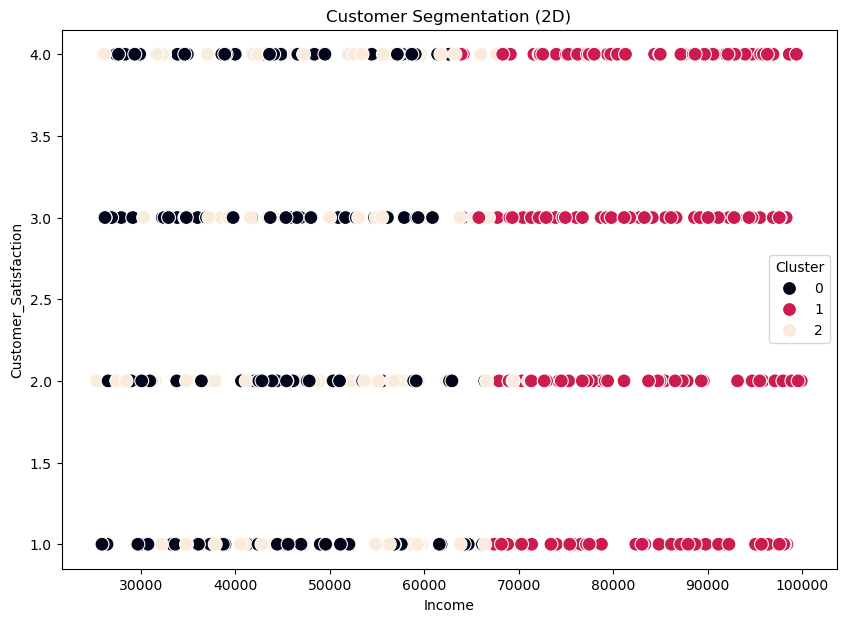

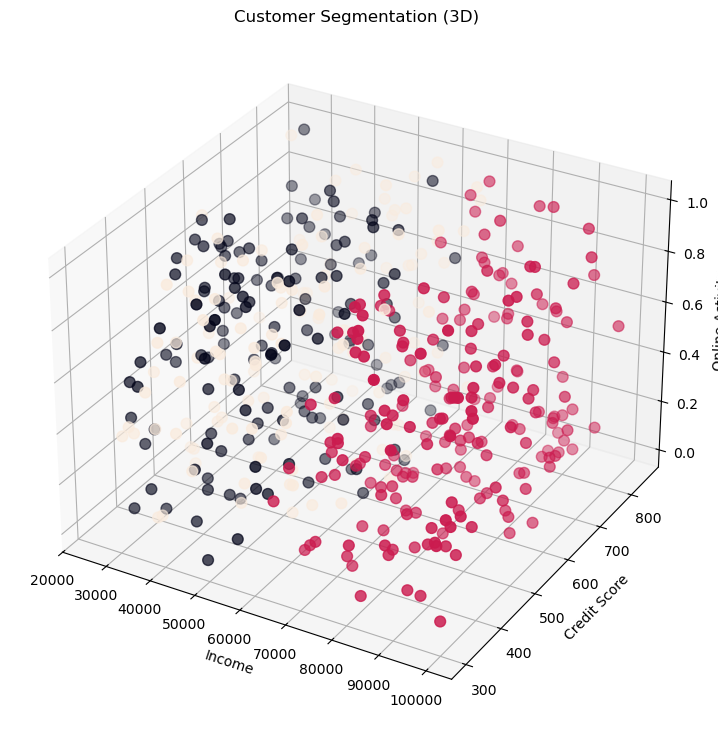

In [65]:
df['Cluster'] = clusters_unscaled

# Visualisasi 2D 
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x="Income", y="Customer_Satisfaction", hue="Cluster", palette="rocket", s=100)
plt.title('Customer Segmentation (2D)')
plt.show()

# Visualisasi 3D 
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Income'], df['Credit_Score'], df['Online_Activity'], c=df['Cluster'], cmap='rocket', s=60)

ax.set_xlabel('Income')
ax.set_ylabel('Credit Score')
ax.set_zlabel('Online Activity')
ax.set_title('Customer Segmentation (3D)')
plt.show()

In [57]:
cluster_profile = df.groupby('Cluster')[features_for_clustering].mean()
print(cluster_profile)

               Income        Age  Education  Credit_Score  Years_with_Bank  \
Cluster                                                                      
0        43512.790209  40.537415   1.367347    568.210884        10.748299   
1        83605.930546  40.152074   1.400922    557.866359        10.566820   
2        48408.415188  39.213235   1.448529    572.882353        11.250000   

         Transaction_Count      Balance  Loan_Approval_Amount  \
Cluster                                                         
0                47.326531  4880.475080          13720.340256   
1                46.193548  5467.134807          24319.494687   
2                53.397059  4614.812540          39731.903186   

         Credit_Card_Limit  Purchase_Frequency  Customer_Satisfaction  \
Cluster                                                                 
0             10834.248934            0.498737               2.476190   
1             10445.789450            0.523970               2.6

In [58]:
K_OPTIMAL = 3

kmeans_final = KMeans(n_clusters=K_OPTIMAL, init='k-means++', max_iter=300, random_state=0)
clusters_final = kmeans_final.fit_predict(df_unscaled) 
df['KMeans_Cluster'] = clusters_final
df.head()

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Cluster,KMeans_Cluster
0,66161.01279,57,1,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,0,2
1,78639.20248,60,0,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,1,1
2,70207.25321,46,0,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,1,2
3,65866.23872,42,0,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,2,1
4,56774.10995,36,1,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,2,1


In [ ]:
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df_full = pd.read_csv(url)

df_full['KMeans_Cluster'] = clusters_unscaled 
print("DataFrame with Cluster (Unscaled):")
print(df_full.head())
cluster_summary = df_full.groupby('KMeans_Cluster').agg({
    'Age': ['mean', 'median', 'min', 'max'],
    'Income': ['mean', 'median', 'min', 'max'],
    'Credit_Score': ['mean', 'median', 'min', 'max'],
    'Customer_Satisfaction': ['mean', 'median', 'min', 'max'],
    'Online_Activity': ['mean', 'median', 'min', 'max'],
    'Balance': ['mean', 'median'],
    'Education': lambda x: x.mode()[0] 
})

print("\nCluster Average Profile (Based on Unscaled Data):")
print(cluster_summary)

DataFrame with Cluster (Unscaled):
        Income  Age    Education  Credit_Score  Years_with_Bank  \
0  66161.01279   57     Bachelor           503                1   
1  78639.20248   60  High School           779                2   
2  70207.25321   46  High School           519               14   
3  65866.23872   42  High School           834               17   
4  56774.10995   36     Bachelor           410               12   

   Transaction_Count      Balance  Loan_Approval_Amount  Credit_Card_Limit  \
0                 41  1968.919899           2517.159284        5813.342700   
1                 27  9797.056371          31501.758840        3991.007637   
2                 95  7024.173403          16444.341580        6036.140567   
3                 77  7992.359261          45233.592940        2691.192862   
4                 58   538.691042          48586.582480       10144.073090   

   Purchase_Frequency  Customer_Satisfaction  Online_Activity  KMeans_Cluster  
0            

**Scaled vs. Unscaled Model**<br>
We are using the unscaled data produces a far clearer and more meaningful cluster separation. The unscaled model achieved a score of 0.362, which indicates a reasonably good cluster structure. In contrast, the scaled model produced a score of only 0.068, which is very close to zero and suggests the clusters are poorly defined and overlap significantly. This happened because K-Means is a distance-based algorithm. While scaling is often necessary, in this specific case, it was counterproductive. The high unscaled score proves that the most important factors for segmenting these customers are the features with large financial scales (like Income, Loan_Approval_Amount, and Credit_Card_Limit). Scaling gave equal weight to all features, allowing "noise" from less important features to hide these natural financial groupings. Therefore, all further analysis should use the unscaled model with K=3.

**Cluster Characteristics**
1. Cluster 0: "High Income Earners"<br>
    This cluster has the highest mean income (approx. $83,606) and the highest mean balance (approx. $5,467)4. Their age, credit score, and other activities are moderate and similar to other groups. The key differentiator is their high income and balance.
2. Cluster 1: "High Debt / Borrowers" <br>
    This group has the highest mean Loan Approval Amount (approx. $39,732) by a very large margin, despite having only a moderate mean income (approx. $48,408)5. They have the highest transaction count and online activity, suggesting they are digitally active and frequently engage with the bank, primarily for borrowing.
3. Cluster 2: "Standard / Low-Income Customers"<br>
    This cluster has the lowest mean income (approx. $43,513) and, most notably, the lowest mean Loan Approval Amount (approx. $13,720)6. Their balance and credit card limits are comparable to the "Borrowers" group, but their income and approved loan amounts are significantly lower.

**Managerial Recommendations**
1. For Cluster 0 (High Income Earners):<br>
    This is premium segment. Target them with wealth management services, high-yield savings accounts, and premium credit cards that offer travel or lifestyle rewards. Prioritize for retention. They are high-value and likely have a low risk profile. Assign dedicated bank managers to this segment for a personalized experience.
2. For Cluster 1 (High Debt / Borrowers):<br>
    This segment is highly profitable due to their borrowing. Target them with debt consolidation products, pre-approved offers for new loans (auto, mortgage), and credit cards with low interest rates or balance transfer options. Prioritize for cross-selling. Since they are digitally active7, use targeted ads within the banking app. Monitor their credit scores 8 to manage risk, as their income is moderate relative to their high loan amounts.
3. For Cluster 2 (Standard / Low-Income Customers):<br>
    Focus on entry-level products. Offer basic credit cards (for credit-building), financial literacy workshops, and small, short-term personal loans. Prioritize for growth. The goal is to move these customers into a more profitable segment. Use marketing to encourage them to increase their savings balance and build their credit score 9 so they can qualify for better products in the future.

